___________
# Python Code Version 3.0 for
# Climate Mathematics: Theory and Applications - Chapter 9
_____________

<b> Samuel S.P. Shen and Richard C.J. Somerville
____________

This Version 3.0 is authored by Briana Ramirez, edited by Samuel Shen. Liu Yang, Sandra Villamar, and Joaquin Stawsky contributed codes to this version.

Video tutorial for the python code can be found at the following URL:
https://www.youtube.com/channel/UC7D9i0kBMzPTHyEhU0h6W9g

This version is based upon the previous version described in the following box.

In [1]:
######################################################################################################################
#This Python Code for Climate Science is written for the book entitled "Climate Mathematics: Theory and Applications"#
#A Cambridge University Press book authored by SSP Shen and RCJ Somerville in July 2019                              #
#The Python codes were based on the R codes written by Samuel Shen Distinguished Professor,                          #
#San Diego State University, USA and were translated from R by Louis Selstad, Stephen Shen,                          #
#Gregori Clarke, and Dakota Newmann and edited by Samuel Shen.                                                       #
######################################################################################################################

In [2]:
#FIRST TIME Python users*****
#These package need to be installed (on the terminal or anaconda interface) before importing them below. 

#Follow this tutorial for package installation before
# https://towardsdatascience.com/importerror-no-module-named-xyz-45e4a5339e1b

In [3]:
#Change your file path to the folder where your downloaded data is stored
#MAC HELP: https://support.apple.com/guide/mac-help/go-directly-to-a-specific-folder-on-mac-mchlp1236/mac
#PC HELP: https://www.sony.com/electronics/support/articles/00015251
import os
# os.chdir("/Users/sshen/climmath/data")
os.chdir('/Users/HP/Documents/sshen/climmath/data')

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
#Style Dictionary to standardize plotting scheme between different python scripts 
import matplotlib.pyplot as plt

styledict = {'xtick.labelsize':20,
             'xtick.major.size':9,
             'xtick.major.width':1,
             'ytick.labelsize':20,
             'ytick.major.size':9,
             'ytick.major.width':1,
             'legend.framealpha':0.0,
             'legend.fontsize':15,
             'axes.labelsize':20,
             'axes.titlesize':25,
             'axes.linewidth':2,
             'figure.figsize':(12,8),
             'savefig.format':'jpg'}
plt.rcParams.update(**styledict)

In [6]:
#Function that creates personalized discrete Colormap
import numpy as np 
from matplotlib import cm as cm1
from matplotlib.colors import ListedColormap, to_rgba

def newColMap(colors):
    """
    This function creates a new color map from a list of colors given
    as a parameter. Recommended length of list of colors is at least 6.
    """
    first = np.repeat([to_rgba(colors[0])], 2, axis = 0)
    last = np.repeat([to_rgba(colors[-1])], 2, axis = 0)
    v = cm1.get_cmap('viridis', 16*(len(colors)-2))
    newcolors = v(np.linspace(0, 1, 16*(len(colors)-2)))
    for (i, col) in enumerate(colors[1:-1]):
        newcolors[16*i : 16*(i+1), :] = to_rgba(col)
    return ListedColormap(np.append(np.append(first,newcolors, axis=0), last, axis=0))


______
# Chapter 9: Python Graphics for Climate Science 
_______

In [7]:
import numpy as np 
import pandas as pd
import warnings
import os
import plotly.express as px 
import sympy as sm
import math as m
import netCDF4 as nc

# import cartopy 
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import matplotlib
from matplotlib import cm as cm1
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Polygon
from matplotlib import animation as animation
from matplotlib.animation import ArtistAnimation
from mpl_toolkits.basemap import Basemap, cm, shiftgrid, addcyclic

from datetime import datetime

from scipy import optimize as opt
from scipy.ndimage import gaussian_filter
import time
warnings.filterwarnings("ignore")

_____
# 9.1 Two-Dimensional Line Plots and Setups of Margins and Labels
______

<b> Two Different Time Series on the Same Plot

In [8]:
#Set up Variables 
time = np.arange(2001,2011)
Tmean = np.array([12.06, 11.78, 11.81, 11.72, 12.02,
                  12.36, 12.03, 11.27, 11.33, 11.66])
Prec = np.array([737.11, 737.87, 774.95, 844.55, 764.03,
                 757.43, 741.17, 793.50, 820.42, 796.80])

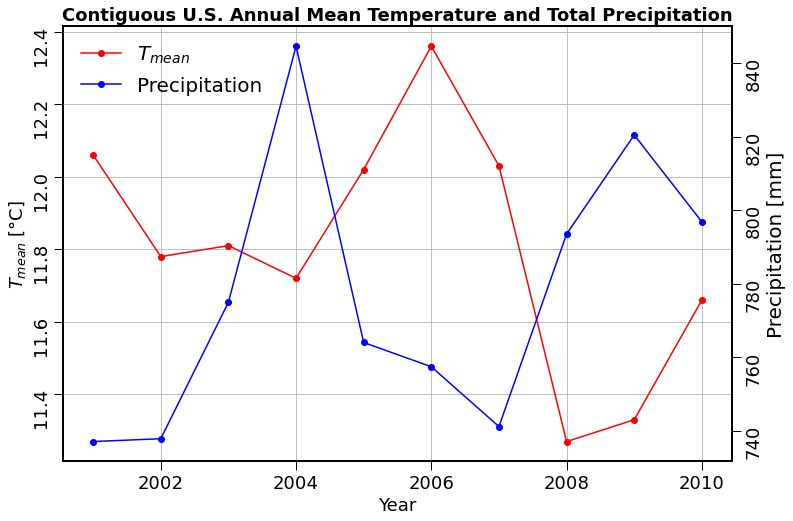

In [9]:
#Fig 9.1
# set up figure
fig, ax = plt.subplots(1,1,figsize=(12, 8))

# plot data 
ax.plot(time, Tmean, 'o-r', label="$T_{mean}$")

# set labels 
ax.set_ylabel("$T_{mean}$ [$\degree$C]", size=18)
ax.set_xlabel("Year", size=18)
ax.set_title("Contiguous U.S. Annual Mean Temperature and Total Precipitation", size=18, fontweight="bold")
ax.grid()
plt.yticks(rotation=90, size=18)
plt.xticks(size=18)

# creates twin axis 
ax1 = ax.twinx()

# plot of twin axis 
ax1.plot(time, Prec, 'o-b', label="Precipitation")
ax1.set_ylabel("Precipitation [mm]")

plt.yticks(rotation=90, size=18)

# create legend 
hand1, lab1 = ax.get_legend_handles_labels()
hand2, lab2 = ax1.get_legend_handles_labels()

ax.legend(handles=hand1+hand2, labels=lab1+lab2,
          loc='upper left', prop={'size': 20});

ax1.tick_params(direction='out')
ax.tick_params(direction='out')

# show plot
plt.show()

<b>Figure Setups: Margins, Fonts, Mathematical Symbols, and More 

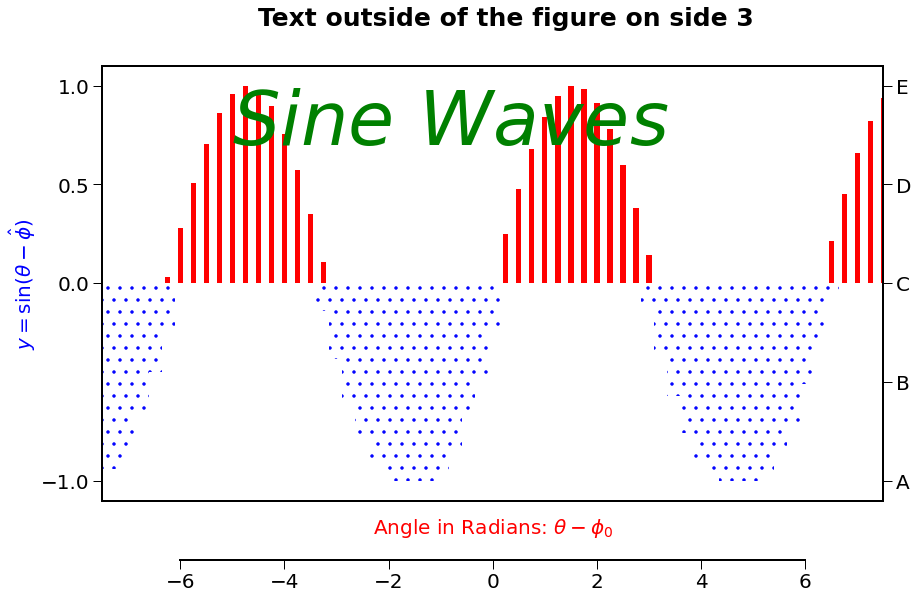

In [10]:
#Fig 9.2
x = 0.25*np.arange(-30, 31)

# find constraint on variables
yPositive = np.where(np.sin(x) > 0)[0]
yNegative = np.where(np.sin(x) < 0)[0]

# set up figure
fig, ax = plt.subplots(figsize=(14,8))
plt.rcParams['hatch.color'] = 'blue'

# create bar plot 
ax.bar(x[yPositive], np.sin(x[yPositive]), width=.1, color='red')
ax.bar(x[yNegative], np.sin(x[yNegative]), hatch='.', fc='white', color="blue")

# add annotations
ax.text(-5, .7, "$Sine\ Waves$", size=75, color='green')
ax.set_xlabel(r"Angle in Radians: $\theta - \phi_0$", color='red',
              labelpad=-75)
ax.set_xticks([2*i for i in range(-3, 4)])
ax.set_xlim(x.min(), x.max())
ax.set_ylabel(r"$y = \sin(\theta - \hat{\phi})$", color='blue')
ax.set_yticks([-1., 0., .5, 1.])
ax.spines['bottom'].set_position(('data',-1.4))
ax.spines['bottom'].set_bounds(-6,6)

# twin axis 
ax1 = ax.twinx()

# plot on twin axis 
ax1.plot(x, np.sin(x), alpha=0)

# set labels
ax1.set_yticks([-1., -.5, 0., .5, 1.])
ax1.set_yticklabels(['A', 'B', 'C', 'D', 'E'])
ax1.tick_params(width=1, length=9)

fig.text(0.28,.95,"Text outside of the figure on side 3", size=25, fontweight="bold")

# show plot 
fig.show()

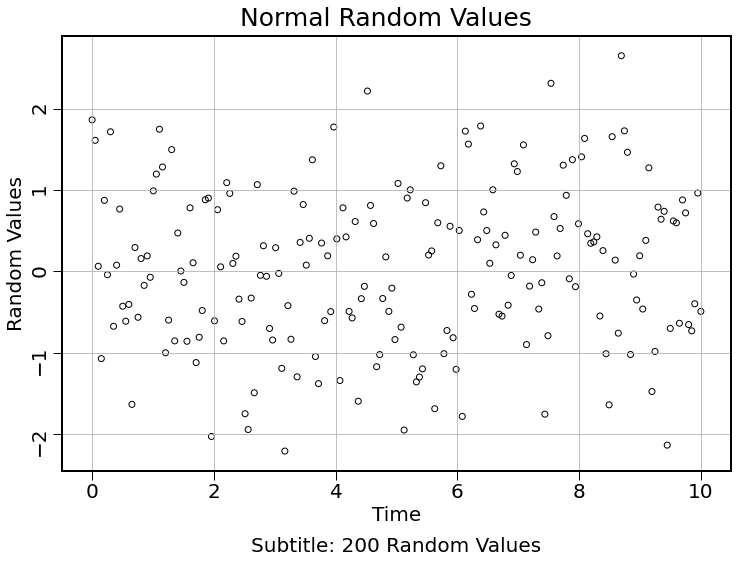

In [11]:
#Fig 9.3
#Illustrating how to adjust font size, axis labels space, and margins.

# create Random Variable
randVals = np.random.standard_normal(200)
x = np.linspace(0, 10, randVals.size)

# set up Figure 
fig, ax = plt.subplots(1, figsize=(12,8))
fig.suptitle("Normal Random Values", fontsize=25, y=.93)

# plot data 
ax.scatter(x, randVals, alpha=1, facecolors='none', edgecolors='k')

# add plot labels 
ax.set_title("Subtitle: 200 Random Values", y=-.2, fontsize=20)
ax.set_ylabel("Random Values")
plt.yticks(rotation=90)

ax.set_yticks([i for i in range(-2, 3)])
ax.set_xlabel("Time")

# show plot and grid
plt.grid()
fig.show()

In [12]:
# read in data 
NOAATemp = np.loadtxt("aravg.ann.land_ocean.90S.90N.v4.0.1.2016.txt",skiprows=0)

# set up variables
x=NOAATemp[:,0]
y=NOAATemp[:,1]
z = [-99] * x.size

In [13]:
def forz(z,y):
    for i in range(2,134):
        
        rslt = [(y[i-2],y[i-1],y[i],y[i+1],y[i+2])]
        z[i] = np.mean(rslt)
    return z

zz = forz(z,y)

In [14]:
def n1func():
    n1 = []
    for i in range(0,137):
        if y[i] >= 0:
            n1.append(i)
    return n1

def n2func():
    n2 = []
    for i in range(0,137):
        if y[i] < 0:
            n2.append(i)
    return n2

n1 = n1func()
n2 = n2func()

In [15]:
x1= x[n1]
y1= y[n1]
x2 = x[n2]
y2 = y[n2]
x3 = x[2:134]
y3 = z[2:134]

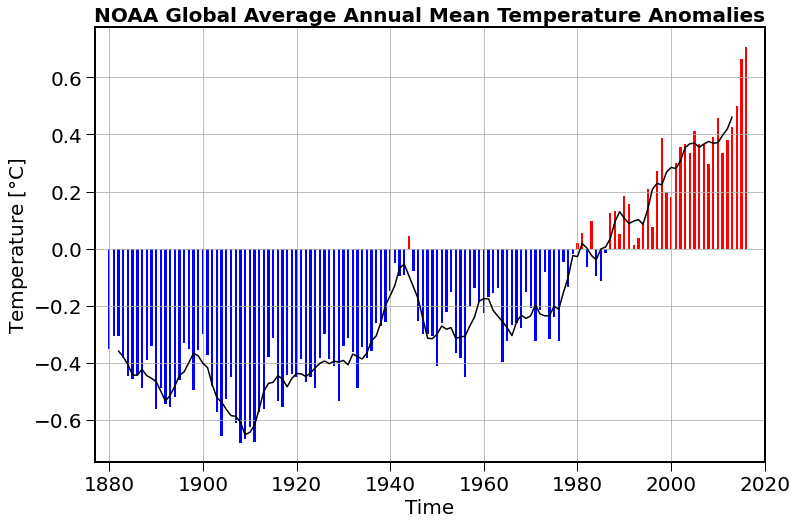

In [16]:
#Fig 9.4
# fancy plot of the NOAAGlobalTemp time series
plt.bar(x1,y1,color='r', width=0.5)
plt.bar(x2,y2,color='b', width=0.5)
plt.plot(x3,y3,color='k')
plt.xlim(1877,2020)

plt.xlabel('Time')
plt.ylabel('Temperature [$\degree$C]')
plt.title('NOAA Global Average Annual Mean Temperature Anomalies', fontweight="bold", size=20)
plt.grid()
plt.show()

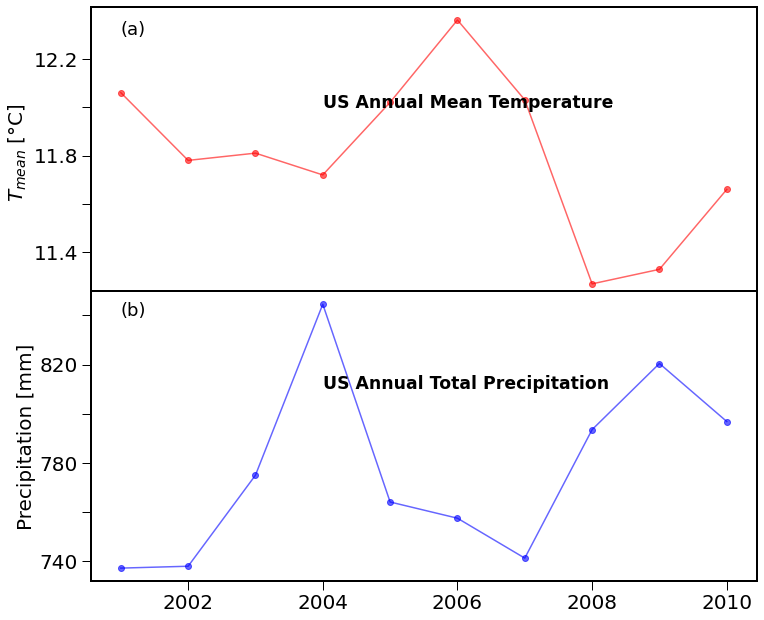

In [17]:
#Fig 9.5
# Contiguous United States (a) annual mean temperature and (b) annual total precipitation 

# plot the US temp and prec time series on the same figure 
fig, ax = plt.subplots(2,1, figsize=(10,8))

# add additional axis 
ax[0].axes.get_xaxis().set_visible(False)

# plot first subplot data
ax[0].plot(time, Tmean, 'ro-', alpha=.6, label="(a)")

ax[0].set_yticks([11.4, np.mean([11.4, 11.8]), 11.8
                  , np.mean([11.8, 12.2]), 12.2])
ax[0].set_yticklabels([11.4, None, 11.8, None, 12.2])
ax[0].set_ylabel("$T_{mean}$ [$\degree$C]")
ax[0].text(2004,12.0,"US Annual Mean Temperature"
           , fontsize = "xx-large", fontweight="bold")

ax[0].text(2001,12.3,"(a)", size=18)

# plot second subplot data 
ax[1].plot(time, Prec, 'bo-', alpha=.6, label="(b)")

ax[1].text(2004,810,"US Annual Total Precipitation"
           , fontsize = "xx-large", fontweight="bold")
plt.ylabel("Precipitation [mm]")
ax[1].set_yticks([740, 760, 780, 800, 820, 840])
ax[1].set_yticklabels([740, None, 780, None, 820, None])

#set labels 
plt.text(2001,840,"(b)", size=18)

# ensures no overlap in plots 
fig.tight_layout(pad=-1.5)

# show plot
fig.show()

________
# 9.2 Color Contour Maps 
_______

<b> Basic Principals for a Python Contour Plot

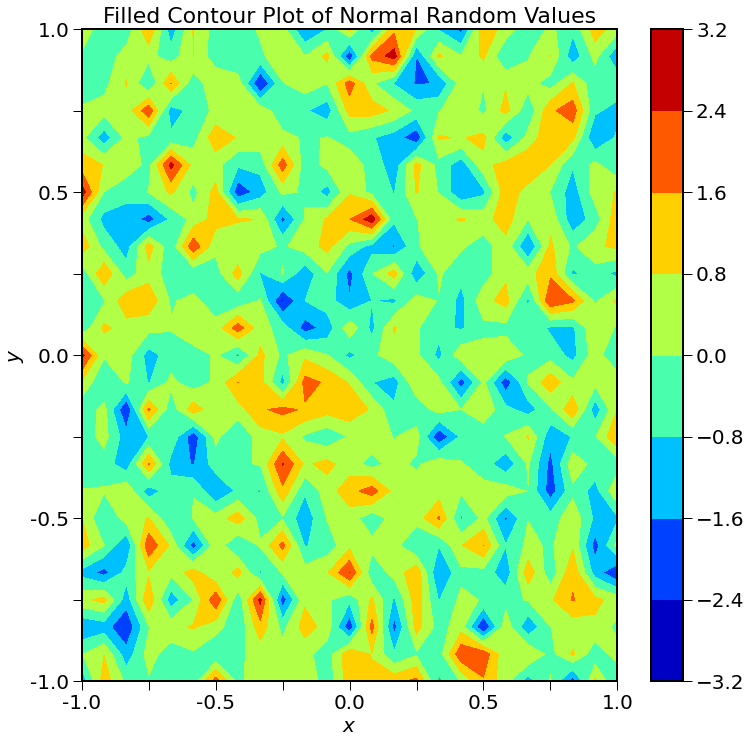

In [18]:
#9.2.1
# set up variables
x, y = np.linspace(-1, 1, 25), np.linspace(-1, 1, 25)
z = np.random.standard_normal(size=(25,25))

# set up figure 
fig, ax = plt.subplots(1,figsize=(12,12))

# plot contour plot
mymap = ax.contourf(x,y,z, cmap=cm1.get_cmap('jet'))

# create and set labels
ticklabs = [-1., None, -.5, None, 0., None, .5, None, 1.]
ax.set_yticklabels(ticklabs)
ax.set_xticklabels(ticklabs)

ax.set_ylabel("$y$")
ax.set_xlabel("$x$")

ax.set_title("Filled Contour Plot of Normal Random Values", size = 22)
fig.colorbar(mymap)

# show plot
fig.show()

<b> Plot Contour Color Maps for Random Values on a Map

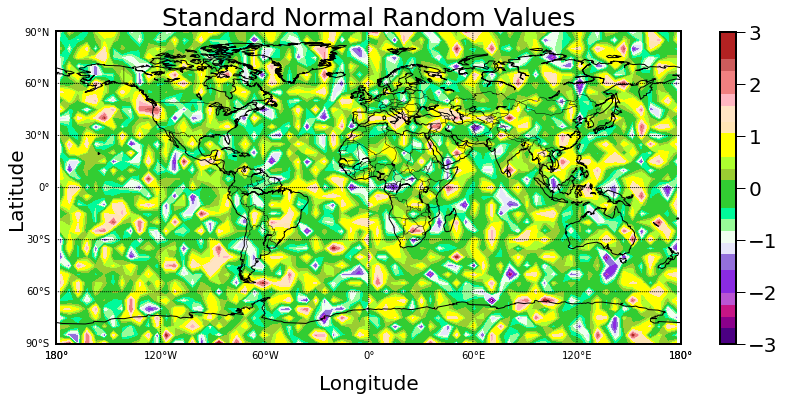

In [19]:
#Fig 9.6
# plot a 5-by-5 grid of global map of standard normal random values
# set up variables
lat = np.linspace(-90, 90, 37)
lon = np.linspace(0, 359.9, 72)

# create data to be plotted 
mapdat = np.reshape(np.random.normal(loc=0.,size=72*37),(37,72))

##
plt.figure(figsize=(14., 7.))

#using the basemap package to put the cylindrical projection map into the image
ReAn = Basemap(projection='cyl',llcrnrlat=-90.,urcrnrlat=90.,\
            llcrnrlon=-180.,urcrnrlon=180.,resolution='c')

#shifting the data because 
lons, data = ReAn.shiftdata(lon, datain = mapdat, lon_0=0)

#draw coastlines, latitudes, and longitudes on the map
ReAn.drawcoastlines(color='black', linewidth=1)
ReAn.drawparallels(np.arange(-90.,91.,30.), labels = [1,0,0,1])
ReAn.drawmeridians(np.arange(-180.,181.,60.), labels= [1,0,0,1])
ReAn.drawcountries()

# create desired Colormap 
colors = ["darkred","firebrick","firebrick","indianred","lightcoral","lightcoral","lightpink"
          ,"bisque","moccasin","yellow","yellow","greenyellow","yellowgreen","limegreen","limegreen"
          ,"mediumspringgreen","palegreen","honeydew","lavender","mediumpurple",
         "blueviolet","blueviolet","mediumorchid","mediumvioletred","darkmagenta","indigo","black"]
colors.reverse()
myColMap = newColMap(colors)

limit = np.linspace(-3.,3.,81)
ReAn_plt = plt.contourf(np.array(lons),np.array(lat),data,limit,cmap = myColMap)
ceb = plt.colorbar(ReAn_plt, shrink = 0.82)
ceb.set_ticks([i for i in range(-3, 4)])
plt.xlabel('Longitude',labelpad = 30)
plt.ylabel('Latitude',labelpad =30)
plt.title('Standard Normal Random Values')
plt.show()
##

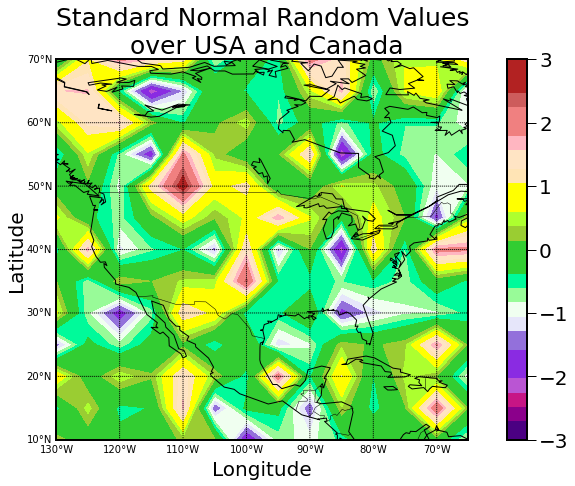

In [20]:
#Fig 9.7
# plot a 5-by-5 grid regional map to cover USA and Canada 
# set up variables 
lat2 = np.linspace(10.,70.,13)
lon2 = np.linspace(230.,295.,14)

mapdat2 = np.reshape(np.random.normal(loc=0.,size=14*13),(13,14))

plt.figure(figsize=(14., 7.))

#using the basemap package to put the cylindrical projection map into the image
ReAn = Basemap(projection='cyl',llcrnrlat=10.,urcrnrlat=70.,\
            llcrnrlon=-130.,urcrnrlon=-65.,resolution='c')

#shifting the data because 
lons2, data = ReAn.shiftdata(lon2, datain = mapdat2, lon_0=0)

#draw coastlines, latitudes, and longitudes on the map
ReAn.drawcoastlines(color='black', linewidth=1)
ReAn.drawparallels(np.arange(-90.,91.,10.), labels = [1,0,0,1])
ReAn.drawmeridians(np.arange(-180.,181.,10.), labels= [1,0,0,1])
ReAn.drawcountries()


limit=np.linspace(-3.,3.,81)
ReAn_plt = plt.contourf(np.array(lons2),np.array(lat2),data,limit,cmap = myColMap)
ceb = plt.colorbar(ReAn_plt)
ceb.set_ticks([i for i in range(-3, 4)])
plt.xlabel('Longitude',labelpad = 20)
plt.ylabel('Latitude',labelpad =30)
plt.title('Standard Normal Random Values\n over USA and Canada')
plt.show()

<b> 9.2.3 Plot Contour Maps from Climate Model Data in NetCDF Files 

In [21]:
# Import Data
datamat = nc.Dataset("air.mon.mean.nc")

In [22]:
# Preparing data for plotting 
Lon = datamat.variables['lon'][:]
Lat = datamat.variables['lat'][:]
Time = datamat.variables['time']
precnc = datamat.variables['air']

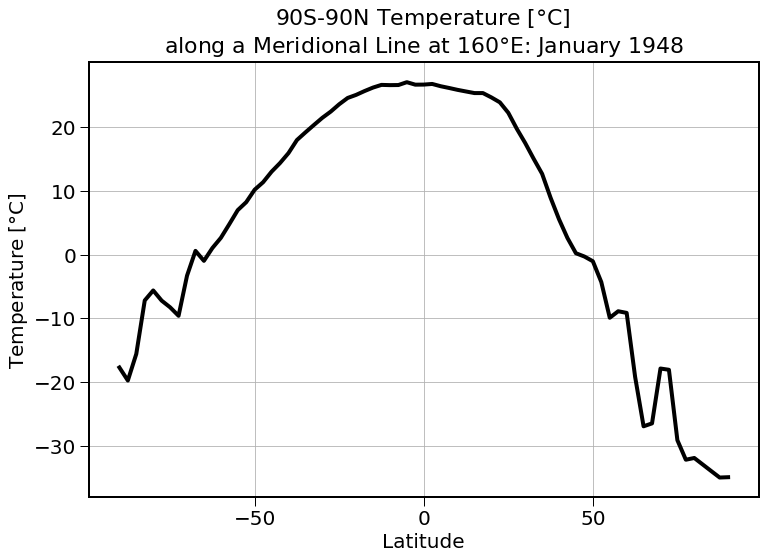

In [23]:
#Fig 9.8
# set up figure
fig, ax = plt.subplots(1, figsize=(12,8))

# plot data 
ax.plot(np.linspace(90, -90, precnc.shape[1]), precnc[0, :, 64], '-k',
       linewidth=4)

# set labels and ticks
ax.set_ylabel("Temperature [$\degree$C]")
ax.set_yticks([10*i for i in range(-3, 3)])
ax.set_xlabel("Latitude")
ax.set_xticks([-50, 0, 50])
ax.set_title("90S-90N Temperature [$\degree$C] \nalong a Meridional Line at 160$\degree$E: January 1948",
             size = 22, pad = 10)
ax.tick_params(length=9, width=1)
ax.grid()

# show plot 
fig.show()

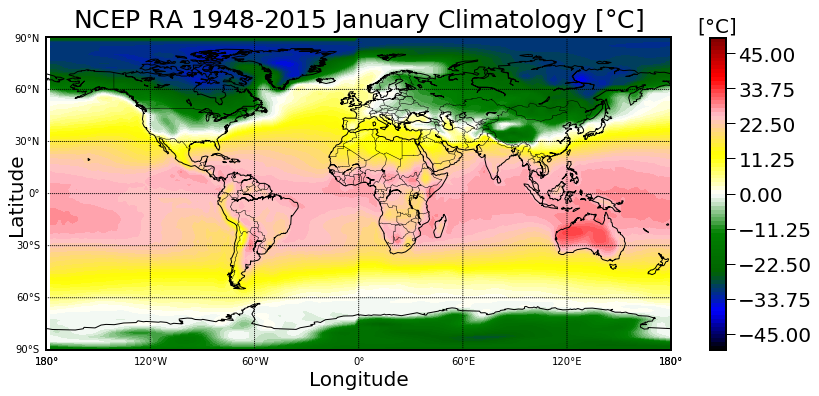

In [24]:
#Fig 9.9(a)
# Compute and plot climatology and standard deviation from Jan 1984 to Dec 2015

# set up variables for map
# number of colors that correspond to data values
contour_levels = np.linspace(-50,50,81)

# create color palette
myColMap = LinearSegmentedColormap.from_list(name='my_list', colors=['black','blue','darkgreen',
                                            'green','white','yellow','pink','red','maroon'], N=256)

JMon = precnc[12*np.arange(67)]
sdmat = np.std(precnc, axis=0)
climmat = np.mean(JMon, axis=0)
levels1 = np.linspace(-50, 50, 81)
levels2 = np.linspace(0, 20, 81)

##
Lat3 = np.linspace(90.,-90.,73)
mapmat = np.reshape(climmat,(73,144))

plt.figure(figsize=(14., 7.))

#using the basemap package to put the cylindrical projection map into the image
ReAn = Basemap(projection='cyl',llcrnrlat=-90.,urcrnrlat=90.,\
            llcrnrlon=-180.,urcrnrlon=180.,resolution='c')

#shifting the data because 
lons, data = ReAn.shiftdata(Lon, datain = mapmat, lon_0 = 0)

#draw coastlines, latitudes, and longitudes on the map
ReAn.drawcoastlines(color='black', linewidth=1)
ReAn.drawparallels(np.arange(-90.,91.,30.), labels = [1,0,0,1])
ReAn.drawmeridians(np.arange(-180.,181.,60.), labels = [1,0,0,1])
ReAn.drawcountries()

limit = np.linspace(-50.,50.,81)

ReAn_plt = plt.contourf(np.array(lons), np.array(Lat3), data, limit, cmap = myColMap)
ceb = plt.colorbar(ReAn_plt, shrink = 0.82)
plt.text(195, 93, "[$\degree$C]", size=20)
plt.xlabel('Longitude',labelpad = 20)
plt.ylabel('Latitude',labelpad = 20)
plt.title('NCEP RA 1948-2015 January Climatology [$\degree$C]', pad = 10)
plt.show()
##

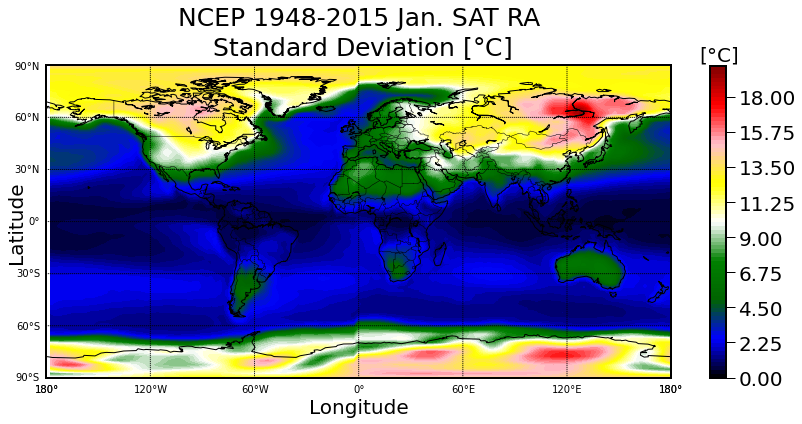

In [25]:
#Fig 9.9(b)
# plot the standard deviation
# set up figure 
myColMap = LinearSegmentedColormap.from_list(name='my_list', colors=['black','blue','darkgreen',
                                            'green','white','yellow','pink','red','maroon'], N=256)

Lat = np.linspace(-90.,90.,73)
Lat = -Lat

plt.figure(figsize=(14., 7.))

#using the basemap package to put the cylindrical projection map into the image
ReAnSd = Basemap(projection='cyl',llcrnrlat=-90.,urcrnrlat=90.,\
            llcrnrlon=-180.,urcrnrlon=180.,resolution='c')

#shifting the data because 
lons, data = ReAnSd.shiftdata(Lon, datain = sdmat, lon_0=0)

#draw coastlines, latitudes, and longitudes on the map
ReAnSd.drawcoastlines(color='black', linewidth=1)
ReAnSd.drawparallels(np.arange(-90.,91.,30.), labels = [1,0,0,1])
ReAnSd.drawmeridians(np.arange(-180.,181.,60.), labels= [1,0,0,1])
ReAnSd.drawcountries()

limit = np.linspace(0.,20.,81)
ReAnSd_plt = plt.contourf(np.array(lons), np.array(Lat), data, limit, cmap = myColMap)
ceb = plt.colorbar(ReAnSd_plt, shrink = 0.82)
plt.text(196, 93, "[$\degree$C]", size=20)
plt.xlabel('Longitude',labelpad = 20)
plt.ylabel('Latitude',labelpad =20)
plt.title('NCEP 1948-2015 Jan. SAT RA\n Standard Deviation [$\degree$C]', pad = 10)

plt.show()

# show and save figure 
# fig.savefig("CH9;JanuarySTD.jpg", bbox_inches='tight');

<b> Plot Data for Displaying Climate Features

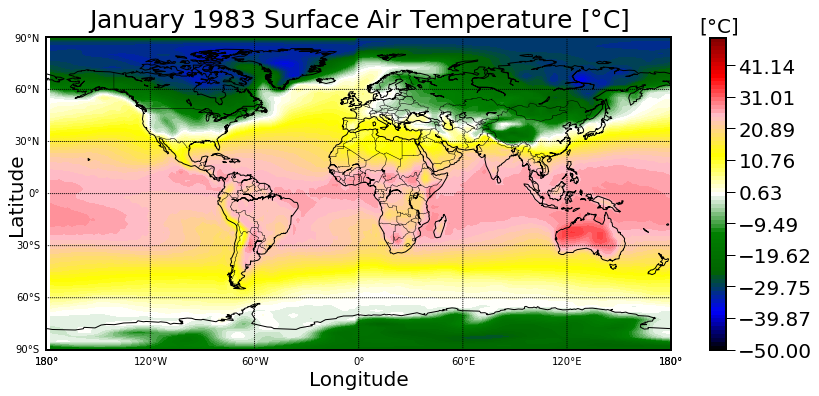

In [26]:
#Fit 9.10
# plot the January 1983 temperature using the above setup
mapmat = climmat

##
plt.figure(figsize=(14., 7.))

#using the basemap package to put the cylindrical projection map into the image
ReAnSd2 = Basemap(projection='cyl',llcrnrlat=-90.,urcrnrlat=90.,\
            llcrnrlon=-180.,urcrnrlon=180.,resolution='c')

#shifting the data  
lons, data3 = ReAnSd2.shiftdata(Lon, datain = mapmat, lon_0=0)


#draw coastlines, latitudes, and longitudes on the map
ReAnSd2.drawcoastlines(color='black', linewidth=1)
ReAnSd2.drawparallels(np.arange(-90.,91.,30.), labels = [1,0,0,1])
ReAnSd2.drawmeridians(np.arange(-180.,181.,60.), labels= [1,0,0,1])
ReAnSd2.drawcountries()

limit = np.linspace(-50.,50,80)

ReAnSd2_plt = plt.contourf(np.array(lons),np.array(Lat),data3,limit,cmap = myColMap)
ceb = plt.colorbar(ReAnSd2_plt, shrink = 0.82)
plt.text(196,93,"[$\degree$C]", size=20)
plt.xlabel('Longitude',labelpad = 20)
plt.ylabel('Latitude',labelpad =20)
plt.title('January 1983 Surface Air Temperature [$\degree$C]', pad = 10)

plt.show()
##

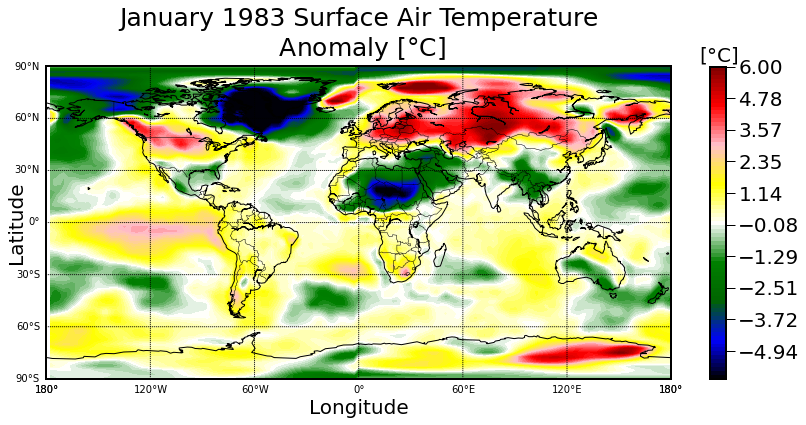

In [27]:
#Fig 9.11
# NOTE: the color distribution compared to the figures in the textbook look slightly different
# due to differences between R and Python ColorMapping characteristics

# plot the January 1983 anomaly from NCEP data
# create variables
levels1 = np.linspace(-6, 6, 81)
anomat = precnc[420,:,:] - climmat

## another method to suppress anomat values into [-6,6]
anomat = np.maximum(np.minimum(anomat, 6), -6) 

##
plt.figure(figsize=(14., 7.))

#using the basemap package to put the cylindrical projection map into the image
ReAnSd2 = Basemap(projection='cyl',llcrnrlat=-90.,urcrnrlat=90.,\
            llcrnrlon=-180.,urcrnrlon=180.,resolution='c')

#shifting the data  
lons, data3 = ReAnSd2.shiftdata(Lon, datain = anomat, lon_0=0)

#draw coastlines, latitudes, and longitudes on the map
ReAnSd2.drawcoastlines(color='black', linewidth=1)
ReAnSd2.drawparallels(np.arange(-90.,91.,30.), labels = [1,0,0,1])
ReAnSd2.drawmeridians(np.arange(-180.,181.,60.), labels= [1,0,0,1])
ReAnSd2.drawcountries()

limit = np.linspace(-6.,6.,80)

ReAnSd2_plt = plt.contourf(np.array(lons),np.array(Lat),data3,limit,cmap = myColMap)
ceb = plt.colorbar(ReAnSd2_plt, shrink = 0.82)
plt.text(196,93,"[$\degree$C]", size=20)
plt.xlabel('Longitude',labelpad = 20)
plt.ylabel('Latitude',labelpad =20)
plt.title('January 1983 Surface Air Temperature\n Anomaly [$\degree$C]', pad = 10)

plt.show()
##

<b> Plot the January 1983 Temperature Anomaly from NCEP data

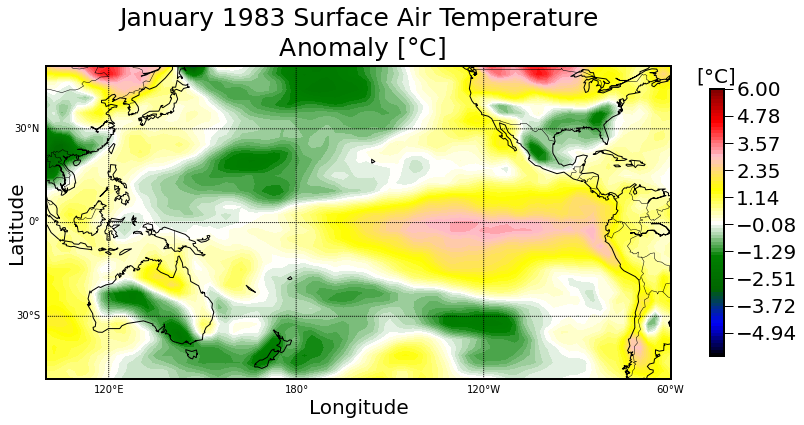

In [28]:
#Fig 9.12(a)
# create and prepare variables 
myslice = range(144)
anomat = anomat[:,myslice]

# set up figure
plt.figure(figsize=(14,6))

ReAnSd3 = Basemap(projection='cyl',lat_0 = 0,lon_0 = 200, llcrnrlat=-50.,urcrnrlat=50.,\
            llcrnrlon=100.,urcrnrlon=300.,resolution='c')

#shifting the data  
lons, data4 = ReAnSd3.shiftdata(Lon, datain = anomat, lon_0=180, fix_wrap_around = True)

#draw coastlines, latitudes, and longitudes on the map
ReAnSd3.drawcoastlines(color='black', linewidth=1)
ReAnSd3.drawparallels(np.arange(-90.,91.,30.), labels = [1,0,0,1])
ReAnSd3.drawmeridians(np.arange(-180.,181.,60.), labels= [1,0,0,1])
ReAnSd3.drawcountries()

limit = np.linspace(-6.,6.,80)

ReAnSd3_plt = plt.contourf(np.array(lons),np.array(Lat),data4,limit,cmap = myColMap)
ceb = plt.colorbar(ReAnSd3_plt, shrink = 0.82)
plt.text(308,45,"[$\degree$C]", size=20)
plt.xlabel('Longitude',labelpad = 20)
plt.ylabel('Latitude',labelpad =20)
plt.title('January 1983 Surface Air Temperature\n Anomaly [$\degree$C]', pad = 10)

plt.show()

In [29]:
#Zoom in to a specific lat-lon region: Pacific

# prepare data 
JMon = list(12*np.arange(68))
climmat = np.zeros((144,73))
for i in range(144):
    for j in range(73):
        climmat[i,j] = np.mean(precnc[JMon,j,i])

anomat = precnc[420,:,:] - climmat.T

# suppress values into the (-5,5) range 
for i in range(73):
    for j in range(144):
        if anomat[i,j] > 5:
            anomat[i,j] = 5
        if anomat[i,j] < -5:
            anomat[i,j] = -5
            
matdiff = anomat
int1 = np.linspace(-5,5,81)

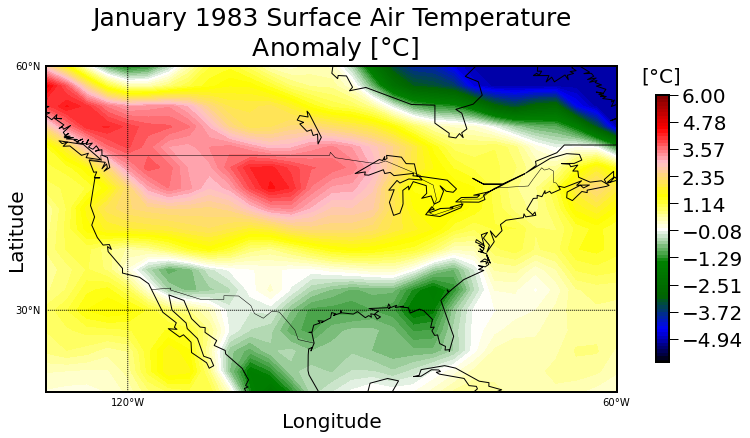

In [30]:
#Fig 9.12(b)
# set up figure 
# set up figure
plt.figure(figsize=(14,6))

ReAnSd3 = Basemap(projection='cyl',llcrnrlat=20.,urcrnrlat=60.,\
            llcrnrlon=-130.,urcrnrlon=-60.,resolution='c')

#shifting the data  
lons, data4 = ReAnSd3.shiftdata(Lon, datain = anomat, lon_0=0)

#draw coastlines, latitudes, and longitudes on the map
ReAnSd3.drawcoastlines(color='black', linewidth=1)
ReAnSd3.drawparallels(np.arange(-90.,91.,30.), labels = [1,0,0,1])
ReAnSd3.drawmeridians(np.arange(-180.,181.,60.), labels= [1,0,0,1])
ReAnSd3.drawcountries()

limit = np.linspace(-6.,6.,80)

ReAnSd3_plt = plt.contourf(np.array(lons),np.array(Lat),data4,limit,cmap = myColMap)
ceb = plt.colorbar(ReAnSd3_plt, shrink = 0.82)
plt.text(-57,58,"[$\degree$C]", size=20)
plt.xlabel('Longitude',labelpad = 20)
plt.ylabel('Latitude',labelpad =20)
plt.title('January 1983 Surface Air Temperature\n Anomaly [$\degree$C]', pad = 10)

plt.show()

In [31]:
datamat.close()

_______
# 9.3 Plot Wind Velocity Field on a Map 
_______

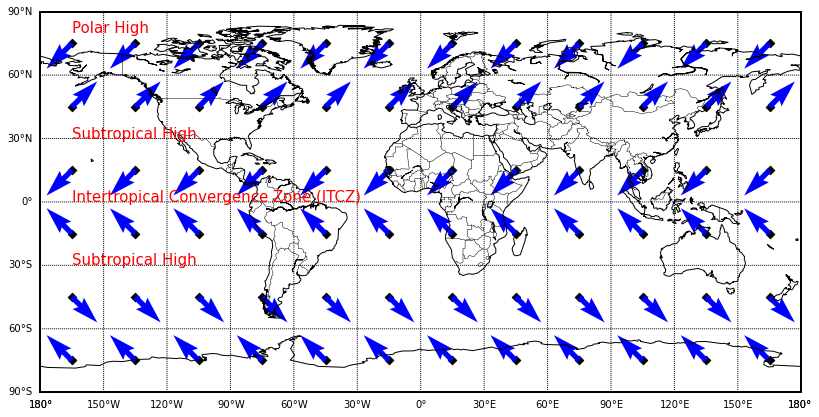

In [32]:
#Fig 9.13
# prepare variables 
##
a = np.array([[-75, -45, -15, 15, 45, 75]])
b = np.array([[-165,-135,-105,-75,-45,-15,15,45,75,105,135,165]])

#concatenating, or combining each array so that they are the same size
lat = np.concatenate((a,a,a,a,a,a,a,a,a,a,a,a), axis = 0)
lon = np.concatenate((b,b,b,b,b,b), axis = 0)

#transposing the newly created arrays
lat_tran = np.transpose(lat)
lon_tran = np.transpose(lon)

#vectors u and v line 799 -- Creating vectors for wind directions
c = np.array([[-1,1,-1,-1,1,-1]])
d = np.array([[1,-1,1,-1,1,-1]])

#concatenating in a similar way as before to match sizes
u = np.concatenate((c,c,c,c,c,c,c,c,c,c,c,c), axis = 0)
v = np.concatenate((d,d,d,d,d,d,d,d,d,d,d,d), axis = 0)

plt.figure(figsize=(16., 7.))

#using the basemap package to put the cylindrical projection map into the image
wmap = Basemap(projection='cyl',llcrnrlat=-90.,urcrnrlat=90.,\
            llcrnrlon=-180.,urcrnrlon=180.,resolution='c')

#draw coastlines, latitudes, and longitudes on the map
wmap.drawcoastlines(color='black', linewidth=1)
wmap.drawparallels(np.arange(-90.,91.,30.), labels = [1,0,0,1])
wmap.drawmeridians(np.arange(-180.,181.,30.), labels= [1,0,0,1])
wmap.drawcountries()

#plot points in the center of each box made by latitude and longitude
x, y = lon_tran, lat
wmap.scatter(x,y,marker='D',color='k')

#plot vector arrows originating from the midpoints
wmap.quiver(x, y, u, v, scale=30, color = 'b' )

#add axis titles
plt.text(-165,0, 'Intertropical Convergence Zone (ITCZ)', color='r', fontsize = 15)
plt.text(-165,30, 'Subtropical High', color = 'r', fontsize = 15)
plt.text(-165,-30, 'Subtropical High', color = 'r', fontsize = 15)
plt.text(-165,80, 'Polar High', color = 'r', fontsize = 15)

plt.show()
##

In [33]:
#-- open netcdf file
ncd = nc.Dataset('uvclm95to05.nc')

#-- read variable
u10 = ncd.variables['u'][0,:,:]
v10 = ncd.variables['v'][0,:,:]
lat = ncd.variables['lat'][::-1]
lon = ncd.variables['lon'][:]

In [34]:
#Fig 9.14 
#The NOAA sea wind field of January 1, 1995. 

## THIS FIGURE IS BEING ADJUSTED SEPARATELY AND WILL BE UPDATED SHORTLY ##

ncd.close()

_____
# 9.4 GG-Plot for Data 

In [35]:
# create dict of state names and labels
state_names = {"AL":"Alabama","AK":"Alaska","AZ":"Arizona","AR":"Arkansas","CA":"California","CO":"Colorado"
               ,"CT":"Connecticut","DE":"Delaware","FL":"Florida","GA":"Georgia","HI":"Hawaii","ID":"Idaho"
               ,"IL":"Illinois","IN":"Indiana","IA":"Iowa","KS":"Kansas","KY":"Kentucky","LA":"Louisiana"
               ,"ME":"Maine","MD":"Maryland","MA":"Massachusetts","MI":"Michigan","MN":"Minnesota","MS":"Mississippi"
               ,"MO":"Missouri","MT":"Montana","NE":"Nebraska","NV":"Nevada","NH":"New Hampshire"
               ,"NJ":"New Jersey","NM":"New Mexico","NY":"New York","NC":"North Carolina","ND":"North Dakota"
               ,"OH":"Ohio","OK":"Oklahoma","OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island","SC":"South Carolina"
               ,"SD":"South Dakota","TN":"Tennessee","TX":"Texas","UT":"Utah","VT":"Vermont","VA":"Virginia"
               ,"WA":"Washington","WV":"West Virginia","WI":"Wisconsin","WY":"Wyoming"}

# create state Abbreviations
state_abr = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
state_df = pd.DataFrame({"State":list(state_names.values()),"Abbreviation":list(state_names.keys())})

In [36]:
#Fig 9.15
# set up and create figure 
fig = px.choropleth(state_df,  # Input Pandas DataFrame
                    locations="Abbreviation",  # DataFrame column with locations
                    color="State",  # DataFrame column with color values
                    locationmode = 'USA-states',
                   color_continuous_scale = 'rainbow') # Set to plot as US States

# update layout of interactive plot 
fig.update_layout(
    title_text = 'Color Map of the United States', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)

# show figure
fig.show()

_____
# 9.5 Animation 
_____

In [37]:
import turtle
import numpy as np
# animation will open in another window... may need to change windows manually 

# window setup
width = 400
height = 500
window = turtle.Screen()
window.setup(width, height)
# window.setup()
window.title('Free Fall Ball')

# ball characteristics
ball = turtle.Turtle()
ball.penup()
ball.color("green")
ball.shape("circle")
# ball.speed('slowest')

g = -9.81 # meters/second^2 = gravitational acceleration
v = 0 # meters/second = initial velocity
y = 490 # meters = initial height
time = np.linspace(0,20.5,100) # 0 to 10 seconds

try:
    while y > 0.0:
        for t in time:
    #         print(t,y)
            v0 = v
            y0 = y
            y = y0 + (v0 * t) + (0.5 * g * t**2)
            v = np.sqrt(v0**2 + 2*g*(y-y0))
            ball.sety(y)
            ball.speed(1 - y/490)
            window.update()

    window.bye()
    # exit window
    
    turtle.done()
except Exception: 
    # so the animation does not end in an error
    pass

In [38]:
# turtle.done()
# uncomment and execute line above if program does not stop alone